# Question 1

To find the answer of this question you should run the following python code cells.

In [1]:
# Code for question 1

import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.base import TransformerMixin
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import sys
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
# fixed random seed
np.random.seed(1)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def label_enc(labels):
    le = preprocessing.LabelEncoder()
    le.fit(labels)
    return le

In [3]:
def load_data(path):
    dataset = arff.loadarff(path)
    data = pd.DataFrame(dataset[0])
    attr = np.array(data.columns)
    data = DataFrameImputer().fit_transform(data).values

    # mask categorical features
    masks = []
    for i in range(len(attr)-1):
        if isinstance(attr[i][1],float):
            masks.append(i)
    return data, masks

class DataFrameImputer(TransformerMixin):

    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

def get_method_scores(data, method):
    X = data[:,0:data.shape[1]-1]
    lenc = label_enc(data[:,data.shape[1]-1])
    y = lenc.transform(data[:,data.shape[1]-1])
    train_sizes = np.array([0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5])
    _, train_scores, test_scores = learning_curve(method, X, y, cv=5, 
                                                  train_sizes=train_sizes,
                                                  scoring=None, shuffle=False, random_state=0)
    return test_scores

                          DecisionTreeClassifier                           
---------------------------------------------------------------------------------------------------------
   Dataset    |   5%   |  10%   |  15%   |  20%   |  25%   |  30%   |  35%   |  40%   |  45%   |  50%   |
---------------------------------------------------------------------------------------------------------
australian    | 72.61% | 74.63% | 75.52% | 77.53% | 77.97% | 79.86% | 83.05% | 81.29% | 80.14% | 82.91% |
balance-scale | 70.10% | 72.47% | 71.20% | 75.69% | 73.77% | 75.67% | 77.74% | 75.99% | 78.09% | 76.98% |
hypothyroid   | 94.94% | 96.31% | 97.77% | 99.18% | 99.21% | 99.42% | 99.42% | 99.50% | 99.31% | 99.20% |




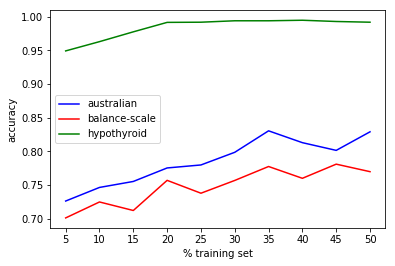

                          BernoulliNB with priors                          
---------------------------------------------------------------------------------------------------------
   Dataset    |   5%   |  10%   |  15%   |  20%   |  25%   |  30%   |  35%   |  40%   |  45%   |  50%   |
---------------------------------------------------------------------------------------------------------
australian    | 73.47% | 79.85% | 81.72% | 80.43% | 79.69% | 79.84% | 80.12% | 81.14% | 82.16% | 81.28% |
balance-scale | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% |
hypothyroid   | 91.38% | 91.81% | 92.23% | 92.23% | 92.23% | 92.26% | 92.23% | 92.23% | 92.23% | 92.23% |




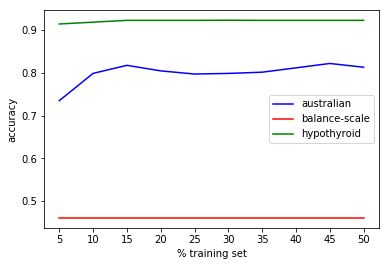

                        BernoulliNB without priors                         
---------------------------------------------------------------------------------------------------------
   Dataset    |   5%   |  10%   |  15%   |  20%   |  25%   |  30%   |  35%   |  40%   |  45%   |  50%   |
---------------------------------------------------------------------------------------------------------
australian    | 73.62% | 79.27% | 81.44% | 78.98% | 78.40% | 79.69% | 78.52% | 79.83% | 80.41% | 80.41% |
balance-scale | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% |
hypothyroid   | 83.88% | 79.59% | 77.44% | 74.79% | 73.12% | 65.05% | 53.60% | 51.30% | 51.09% | 50.26% |




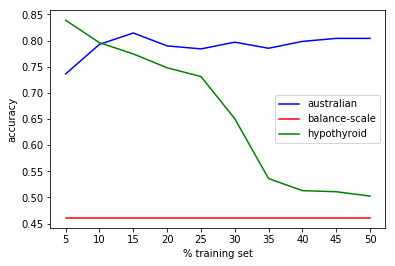

In [4]:
def test_method(method, title):
    # load data
    paths = ['australian','balance-scale','hypothyroid']
    scores = []

    for path in paths:
        score = []
        path += '.arff'
        data, masks = load_data(path)

        # training on data with different portions of training data
        score_array = get_method_scores(data, method)
        # we got a [num portions][num folds] array, need to avg them into 
        # a list of scores for each portion
        for ar in score_array:
            score.append(np.mean(ar))
        scores.append(score)

    # print the results
    method_name = method.__class__.__name__+' '+title
    header = "{:^75}".format(method_name) + '\n' + '-' * 105  + '\n' + \
    "{:^13} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} |" \
    .format("Dataset", "5%", "10%", "15%", "20%", "25%", "30%", "35%", "40%", "45%", "50%") + \
     '\n' + '-' * 105

    # print result table
    print(header)
    for i in range(len(scores)):
        print("{:<14}".format(paths[i]),end="")
        for j in range(len(scores[i])):
            print("| {:>6.2%} ".format(scores[i][j]),end="")
        print('|')
    print('\n')
    plt.plot(range(5,55,5),scores[0],label='australian',color='blue')
    plt.plot(range(5,55,5),scores[1],label='balance-scale',color='red')
    plt.plot(range(5,55,5),scores[2],label='hypothyroid',color='green')
    plt.xlabel('% training set')
    plt.ylabel('accuracy')
    plt.xticks(np.arange(5,55, step=5))
    plt.legend()
    plt.show()

test_method(DecisionTreeClassifier(random_state=0),'')
test_method(BernoulliNB(),'with priors')
test_method(BernoulliNB(fit_prior=False),'without priors')

# Question 2

In [5]:
#Libraries for Question 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [6]:
### loading dataset
data=pd.read_csv("titanic.csv")
input_columns = ['Pclass','Sex','Age','Siblings_Spouses_Aboard','Parents_Children_Aboard']
print(data.head())

   Pclass  Sex  Age  Siblings_Spouses_Aboard  Parents_Children_Aboard  \
0       3    1   20                        1                        0   
1       1    0   30                        1                        0   
2       3    0   20                        0                        0   
3       1    0   30                        1                        0   
4       3    1   30                        0                        0   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


In [7]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'Siblings_Spouses_Aboard',
       'Parents_Children_Aboard', 'Survived'],
      dtype='object')

In [8]:
##Pre-precessing (min_max Normalization) 
minimum = np.min(data,axis=0)
maximum = np.max(data,axis=0)
NormalData = (data - minimum)/(maximum-minimum)
print(NormalData.shape)
print(type(NormalData))

(887, 6)
<class 'pandas.core.frame.DataFrame'>


In [9]:
###Train and test Split 
# print(train_data)
train_data = NormalData.iloc[:620,]
test_data = NormalData.iloc[620:,]

x_train = train_data[input_columns]
y_train = train_data['Survived']
x_test = test_data[input_columns]
y_test = test_data['Survived']
print(train_data.shape)
print(test_data.shape)

(620, 6)
(267, 6)


In [10]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

train_accuracy = metrics.accuracy_score(y_train,tree.predict(x_train))
test_accuracy = metrics.accuracy_score(y_test,tree.predict(x_test))

print('Train Accuracy = ', train_accuracy , ', Test Accuracy = ', test_accuracy)

Train Accuracy =  0.8564516129032258 , Test Accuracy =  0.8277153558052435


In [11]:
training_scores = []
Test_scores = []
n_min = 2
n_max = 20
for n in range(n_min,n_max):
    tree = DecisionTreeClassifier(min_samples_leaf = n)
    tree.fit(x_train, y_train)    
    Test_scores.append(metrics.roc_auc_score(y_test, tree.predict_proba(x_test)[:,1]))
    training_scores.append(metrics.roc_auc_score(y_train, tree.predict_proba(x_train)[:,1]))

optimal_min_samples_leaf = np.argmax(Test_scores) + 2
print('optimal_min_samples_leaf is = ', optimal_min_samples_leaf)

optimal_min_samples_leaf is =  5


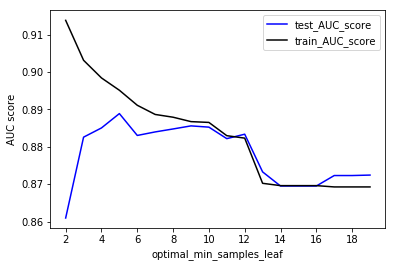

In [12]:
plt.plot(range(n_min,n_max),Test_scores,label='test_AUC_score',color='blue')
plt.plot(range(n_min,n_max),training_scores,label='train_AUC_score',color='black')
plt.xlabel('optimal_min_samples_leaf')
plt.ylabel('AUC score')
plt.xticks(np.arange(n_min,n_max, step=2))
plt.legend()
plt.show()

In [13]:
## optimal min_samples_leaf with gridsearchcv10

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_leaf': np.arange(n_min,n_max,1)}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=10, scoring='roc_auc')
grid_tree.fit(x_train, y_train)

print(grid_tree.best_params_['min_samples_leaf'])

17


In [15]:
# prior probability of surviving P(S=true) is adjusted by an observation 
#  that the passanger is a female and is traveling in the fist class
# from probability:
# P(S=true | G=female,C=1) = P(S=true,G=female,C=1) / P(G=female,C=1)

# data(G=female,C=1)
data1 = data[data.Sex==1]
data2 = data1[data1.Pclass==1]

prob = data2[data2.Survived==1].count()[0]/data2.count()[0]

print(prob)

0.36885245901639346
